#Introdución al TTDP
El Tourist Trip Design Problem (TTDP) es el problema de planificar itinerarios turísticos personalizados para visitar un conjunto de puntos de interés (POIs, points of interest) optimizando el beneficio para el turista sin violar ciertas restricciones (tiempo disponible, presupuesto, horarios, etc.

En términos generales, se busca maximizar la “satisfacción” o puntuación total obtenida por visitar POIs, sujeta a límites como la duración del viaje, horarios de apertura/cierre de atracciones, y otras condiciones. El TTDP se deriva de problemas clásicos de rutas en investigación de operaciones, en particular es una extensión del Orienteering Problem (OP) y del Team Orienteering Problem (TOP) (problema de recorridos con premios), incorporando características propias del turismo (por ejemplo, varias rutas/días, grupos de turistas, múltiples categorías de atracciones, etc.).

se ha demostrado que el TTDP es NP-hard.  lo que implica que los métodos exactos (búsqueda exhaustiva, programación entera, etc.) solo pueden resolver instancias pequeñas en tiempo razonable. Por ello, en la práctica es necesario recurrir a heurísticas y metaheurísticas que hallen buenas soluciones en tiempos aceptables.
Además, el TTDP moderno suele integrar múltiples objetivos (por ejemplo, maximizar satisfacción y a la vez minimizar costos o tiempos)


Nuevas consideraciones como la sostenibilidad ambiental y las preferencias específicas de los usuarios han llevado a variantes más ricas del TTDP. Por ejemplo, un trabajo de Ruiz-Meza y Montoya-Torres (2021) introdujo un modelo de TTDP que incluye preferencias heterogéneas en un grupo de turistas, selección de modos de transporte (multimodal) y minimización de emisiones de CO₂ como objetivos adicionales

## Variantes y extensiones del TTDP
El TTDP básico asume solo un turista, un solo día, un conjunto de POIs con sus ganancias (puntuaciones) y tiempos de visita, y una restricción de tiempo total. Sobre esta base se han desarrollado numerosas variantes para modedelar situaciones reales más complejas

**Variantes y exntensiones del TTDP**

**Multiples rutas:** Esta vaiante busca planificar itinerarios que abarcan más de un día o múltiples rutas simultaneas.
**Grupos de turistas con preferencias heterogéneas:** En lugar de un turista “promedio”, considerar un grupo donde cada turista valora diferentemente cada POI. El objetivo aquí puede incluir la equidad (que todos queden satisfechos) o maximizar algún agregado de las utilidades individuales. Esta variante implica que quizás no todos los miembros del grupo sigan exactamente la misma ruta; se pueden permitir desviaciones individuales en ciertos tramos para atender intereses particulares.

**Múltiples modos de transporte (multimodal):** Permitir distintos medios de transporte (por ejemplo, caminar, autobús, bicicleta, coche) para desplazarse entre POIs.

**Restricciones de recursos y presupuestos:** Por ejemplo, un límite de presupuesto monetario, límites de distancia o energía

**Incertidumbre y lógica difusa:** La planificación turística enfrenta incertidumbres (clima, duración real de visitas, preferencias imprecisas). Algunos trabajos incorporan parámetros difusos – por ejemplo, puntuaciones de POIs expresadas lingüísticamente (alto, medio, bajo interés) en lugar de valores precisos, o tiempos de viaje difusos. Brito et al. propusieron un TTDP difuso (fuzzy) donde la función objetivo es difusa para reflejar la imprecisión en la satisfacción de los turistas.

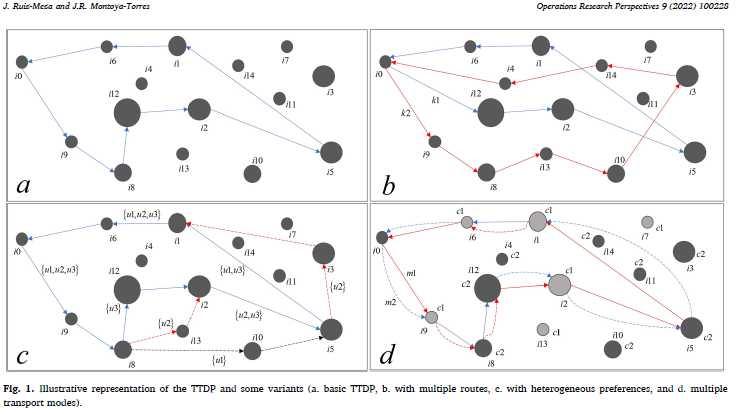

**TTDP “verde” o sostenible:** En esta extensión, además de la satisfacción del turista, se considera el impacto ambiental. Un caso es minimizar las emisiones de CO₂ del transporte usado en la ruta.



# Enfoques de solución para el TTDP
**Métodos exactos:** En problemas de pequeño tamaño, se puede resolver el TTDP exactamente formulándolo como un modelo de Programación Lineal Entera Mixta (MILP) – por ejemplo, usando variables binarias para indicar si se visita un POI o se viaja por un arco. Existen modelos en la literatura para variantes específicas (TOPTW, etc.). Sin embargo, resolver estos modelos con algoritmos exactos (como Branch-and-Bound, Branch-and-Cut) solo es factible en instancias reducidas debido a la explosión combinatoria. Frecuentemente, los autores usan solvers como CPLEX o Gurobi para validar sus heurísticas en instancias pequeñas (comparando con el óptimo)
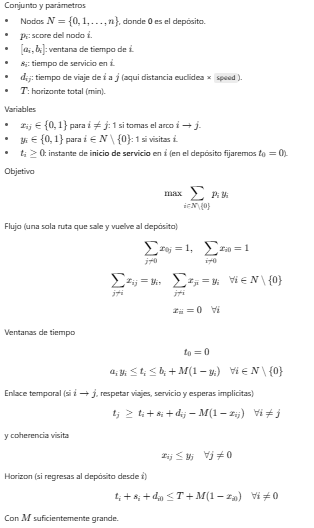

Dado el interés es implementar un algoritmo para casos realistas, las soluciones más avanzadas están enfocadas en el uso de **hurísticas y metaheurística**.
Las **heurísticas** son métodos ad-hoc generalmente constructivos o de mejora local diseñados para el problema, mientras que las **metaheurísticas** son marcos más generales inspirados en procesos naturales o métodos estocásticos que guían la búsqueda de soluciones. Estas técnicas constituyen la mayoría de aportaciones en TTDP

**Heurística voraz (greedy)** para construir un itinerario
Una heurística greedy (voraz) **elige paso a paso la decisión que parece más prometedora en cada momento.** En el TTDP, una heurística voraz típica sería: comenzar en el punto de partida (por ejemplo, el hotel), y luego repetir:
Desde el POI actual, entre los POIs no visitados, elegir el de mayor beneficio (puntuación) que aún pueda visitarse sin violar las restricciones de tiempo (es decir, que puedas ir hasta él, visitarlo y todavía regresar al hotel antes de que se agote el tiempo).
Añadir ese POI a la ruta y actualizar el tiempo consumido.
Si ningún POI viable queda (o agregar otro violaría restricciones), terminar la ruta volviendo al inicio.

**GRASP: Greedy Randomized Adaptive Search Procedure**
El **GRASP (Procedimiento de Búsqueda Aleatorizada y Adaptativa Greedy)** La idea central es ejecutar iterativamente un proceso de **dos fases: construcción y búsqueda local**, cada vez de forma parcialmente aleatoria, acumulando múltiples soluciones y quedándose con la mejor encontrada.

**Fase de construcción aleatorizada**: Se arma una solución (ruta) de manera similar a una heurística voraz, **pero introduciendo aleatoriedad controlada**. En lugar de siempre escoger el mejor siguiente POI determinísticamente, GRASP forma en cada paso una **Lista Restringida de Candidatos (RCL):** un subconjunto de los mejores movimientos posibles. Luego elige aleatoriamente uno de ellos. Por ejemplo, la RCL podría ser los 3 o 5 POIs más prometedores alcanzables como próximo destino; se elige uno al azar de esa lista.

El grado de aleatoriedad se controla con un parámetro α: α=0 produce comportamiento puramente greedy (RCL de tamaño 1 siempre el mejor), α=1 sería totalmente aleatorio dentro de los factibles; típicamente α intermedio permite diversificar soluciones. Esta fase produce una solución factible completa.

Fase de mejora (búsqueda local): A la solución construida se le aplican movimientos locales (intercambios, reordenamientos, etc., ver próxima sección) para mejorarla hasta llegar a un óptimo local (cuando ya no se encuentra mejora en su vecindad). Así se refina la solución aleatoria inicial.



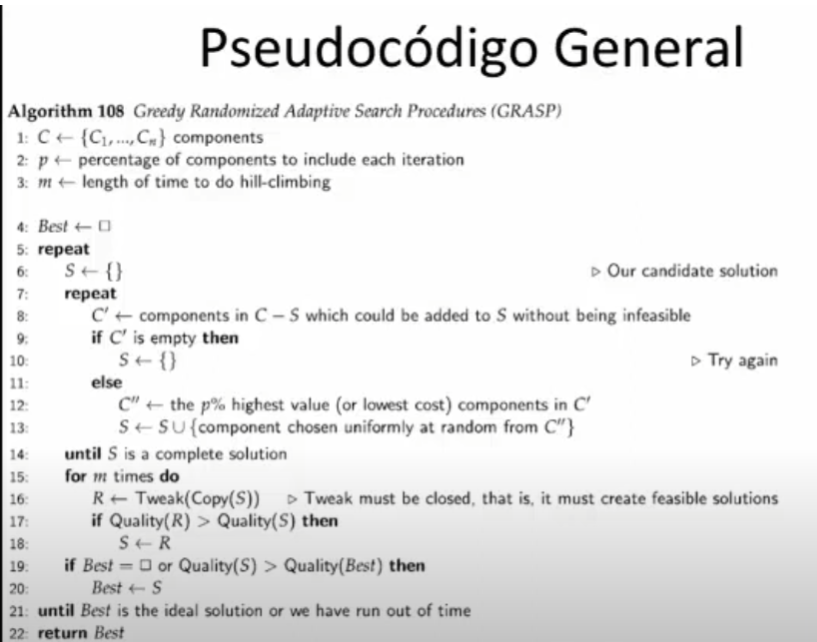

GRASP combina lo mejor de dos mundos: la rapidez para construir soluciones factibles y la eficacia de la optimización local, junto con un componente de aleatoriedad que evita estancarse en soluciones repetidas. En el contexto del Problema de Diseño de Rutas Turísticas (TTDP), este enfoque ha demostrado ser altamente efectivo. Por ejemplo, Vansteenwegen et al. (2011) aplicaron GRASP para resolver un Problema de Orientación Turística con Ventanas de Tiempo (TOPTW) y desarrollaron la herramienta interactiva City Trip Planner.

Otros autores han extendido el método para abordar escenarios más complejos. Brito et al. (2019) propusieron una variante llamada Fuzzy GRASP, que utiliza lógica difusa para evaluar rutas bajo condiciones de incertidumbre, manejando preferencias imprecisas de los usuarios. Además, se han desarrollado adaptaciones de GRASP para TTDP en contextos donde los puntos de interés (POIs) están agrupados por categorías y asociados a puntajes difusos, lo que resalta la flexibilidad de este enfoque en problemas con múltiples restricciones y criterios no deterministas.

#Modelado de OPTW con soluciones presentes en la literatura.

In [ ]:
# Instancia pequeña (tipo hptoptw-j11a)
# Formato: (id, x, y, service, score, tw_open, tw_close)

nodes = [
    (0,  53, 46,   0,  0,   1, 700),  # depósito
    (1,  43, 32,  90, 20,  29, 101),
    (2,  46, 56,  90, 20, 115, 183),
    (3,  33, 54,  90, 10, 496, 595),
    (4,  49, 23,  90, 20, 235, 318),
    (5,  60, 45,  90, 10, 119, 198),
    (6,  47, 40,  90, 30,  16, 108),
    (7,  36, 41,  90, 10, 392, 475),
    (8,  53, 57,  90, 20, 108, 183),
    (9,  51, 25,  90, 10, 160, 233),
    (10, 55, 34,  90, 30,  51, 123),
]

# Parámetros globales
T = 700.0     # horizonte total (min) 11 horas y 40 minutos.
speed = 1.0   # min por unidad de distancia euclídea (1 = simple)

# Accesos por nombre (más fácil de leer abajo)
#id: número de vertices
#x: coordenada en X
#Y: coordenada en Y
#service: Duración de la visita
#score: Beneficio de la visita
#tw_open: inicio de la ventana de tiempo
#tw_close: fin de la ventana de tiempo
IDX = { 'id':0, 'x':1, 'y':2, 'service':3, 'score':4, 'tw_open':5, 'tw_close':6 }


print("Nodos cargados:", len(nodes))


Nodos cargados: 11


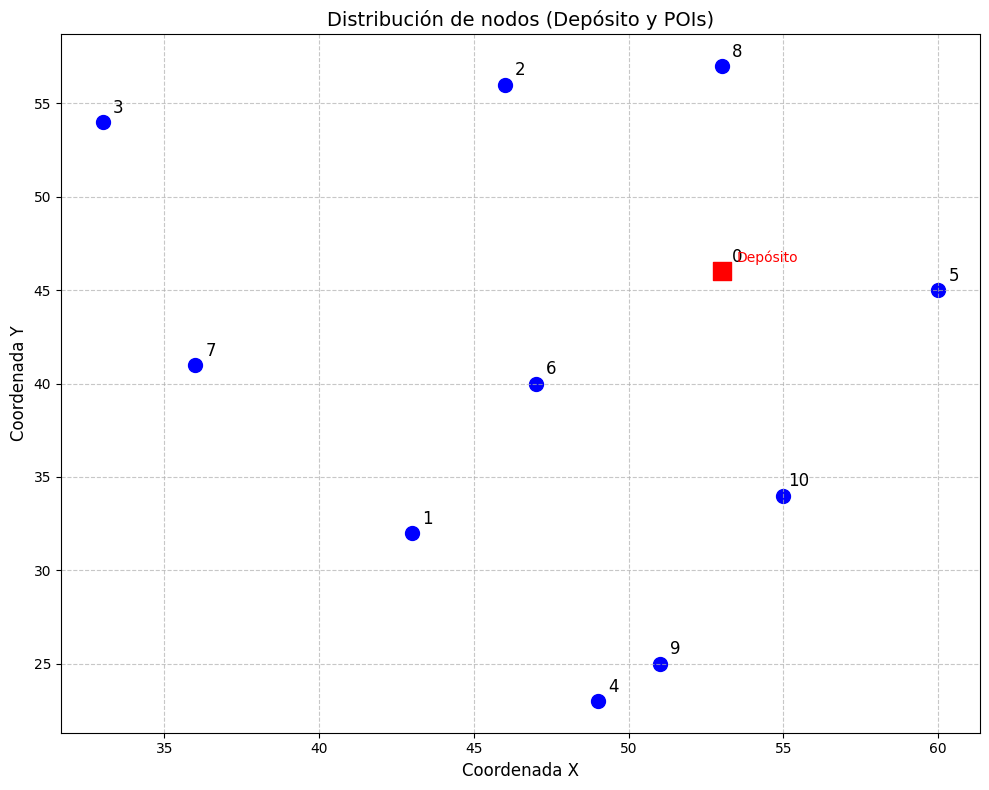

In [ ]:
import matplotlib.pyplot as plt

# Extraer coordenadas X e Y de todos los nodos
x_coords = [node[IDX['x']] for node in nodes]
y_coords = [node[IDX['y']] for node in nodes]
node_ids = [node[IDX['id']] for node in nodes]

# Configurar el gráfico
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, color='blue', s=100)  # s= tamaño de los puntos

# Añadir etiquetas a cada nodo
for i, (x, y, node_id) in enumerate(zip(x_coords, y_coords, node_ids)):
    plt.text(x + 0.5, y + 0.5, f'{node_id}', fontsize=12, ha='center')

    # Resaltar el depósito (nodo 0) con color diferente
    if node_id == 0:
        plt.scatter(x, y, color='red', s=150, marker='s')  # cuadrado rojo para depósito
        plt.text(x + 0.5, y + 0.5, 'Depósito', fontsize=10, color='red')

# Añadir detalles del gráfico
plt.title('Distribución de nodos (Depósito y POIs)', fontsize=14)
plt.xlabel('Coordenada X', fontsize=12)
plt.ylabel('Coordenada Y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
#Calcular distancias y tiempo
import math

def dist(i,j):
  xi,yi = nodes[i][IDX['x']], nodes[i][IDX['y']]
  xj,yj = nodes[j][IDX['x']], nodes[j][IDX['y']]
  return math.sqrt((xi-xj)**2 + (yi-yj)**2) #Distancia euclídea

In [ ]:
def travel_time(i, j):
    return dist(i, j) * speed

In [ ]:
def evaluate_route(route):
    """
    route: lista de ids de POIs (NO incluir 0; depósito implícito al inicio y fin).
    Devuelve: (feasible, total_score, total_time, arrivals)
    """
    time = 0.0
    curr = 0      # empezamos en depósito
    visited = set() #Almacena los IDs de nodos ya visitados. No se ppermiten duplicados
    arrivals = [] #Tipo list registra los tiempos de llegada a cada POI en orden de visita
    total_score = 0.0

    for v in route:
        # chequeos básicos
        if v == 0 or v >= len(nodes) or v in visited:
            return False, 0.0, time, arrivals

        # viajar a v
        time += travel_time(curr, v)

        # ventanas de tiempo
        tw_open = nodes[v][IDX['tw_open']]
        tw_close = nodes[v][IDX['tw_close']]
        if time > tw_close + 1e-9:  # llegaste demasiado tarde
            return False, 0.0, time, arrivals

        # si llegas antes, esperas
        if time < tw_open:
            time = tw_open

        # registrar llegada y hacer servicio
        arrivals.append(time)
        time += nodes[v][IDX['service']]
        total_score += nodes[v][IDX['score']]

        visited.add(v)
        curr = v

    # volver al depósito
    time += travel_time(curr, 0)
    if time > T + 1e-9:
        return False, 0.0, time, arrivals

    return True, total_score, time, arrivals
    ##Como pensar este evaluador
    #Ventanas duras: Si llegas depués de tw_close, es infactible
    #Puedes esperar si llegas antes del tw_open.
    #Siempre vuelves a 0 y verificas que no se pase del tiempo máximo T



In [ ]:
### Pequeña prueba del evaluador
print("Factible, Total_Score, Tiempo, Llegadas")
print(evaluate_route([6, 10,4])) # ruta corta de ejemplo


Factible, Total_Score, Tiempo, Llegadas
(True, 80.0, 348.3452350598575, [16, 116.0, 235])


#solución Exacta

In [ ]:
!pip -q install pulp
# Instala PulP trae el solver CBC por defecto

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 77.3 MB/s eta 0:00:00


In [ ]:
N = list(range(len(nodes)))
V = [i for i in N if i != 0]
A = [(i,j) for i in N for j in N if i != j]
M = 10_000  # Big-M simple (suficiente para esta instancia)

In [ ]:
import pulp as pl
# ---- Modelo ----
m = pl.LpProblem("OPTW_Exact", pl.LpMaximize)

# Variables
x = pl.LpVariable.dicts("x", (N, N), lowBound=0, upBound=1, cat=pl.LpBinary)  # arcos
y = pl.LpVariable.dicts("y", V, lowBound=0, upBound=1, cat=pl.LpBinary)      # visita
t = pl.LpVariable.dicts("t", N, lowBound=0, upBound=T, cat=pl.LpContinuous)  # tiempos

# Objetivo
m += pl.lpSum(nodes[i][IDX['score']] * y[i] for i in V)

# Flujo
m += pl.lpSum(x[0][j] for j in N if j != 0) == 1
m += pl.lpSum(x[i][0] for i in N if i != 0) == 1
for i in V:
    m += pl.lpSum(x[i][j] for j in N if j != i) == y[i]
    m += pl.lpSum(x[j][i] for j in N if j != i) == y[i]
for i in N:
    m += x[i][i] == 0

# Ventanas
m += t[0] == 0
for i in V:
    a_i, b_i = nodes[i][IDX['tw_open']], nodes[i][IDX['tw_close']]
    m += t[i] >= a_i * y[i]
    m += t[i] <= b_i + M*(1 - y[i])

# Enlaces temporales y coherencia
for i,j in A:
    travel = travel_time(i, j)
    service_i = nodes[i][IDX['service']]
    m += t[j] >= t[i] + service_i + travel - M*(1 - x[i][j])
    if j != 0:
        m += x[i][j] <= y[j]

# Límite de horizonte al volver al depósito
for i in V:
    m += t[i] + nodes[i][IDX['service']] + travel_time(i, 0) <= T + M*(1 - x[i][0])

# ---- Resolver ----
m.solve(pl.PULP_CBC_CMD(msg=False))
print("Status:", pl.LpStatus[m.status])
print("Objective (score):", pl.value(m.objective))

# Reconstrucción de ruta
succ = {}
for i in N:
    for j in N:
        if i != j and pl.value(x[i][j]) > 0.5:
            succ[i] = j

route = []
curr = 0
while True:
    nxt = succ.get(curr, None)
    if nxt is None or nxt == 0:
        break
    route.append(nxt)
    curr = nxt

print("Route:", route)
print("Times:", {i: round(pl.value(t[i]),2) for i in N})
print("Arcs used:", [(i,j) for i in N for j in N if i!=j and pl.value(x[i][j]) > 0.5])

Status: Infeasible
Objective (score): 180.0
Route: [6, 7, 3, 4, 5, 2, 10, 1, 8, 9]
Times: {0: 0.0, 1: 29.0, 2: 115.0, 3: 496.0, 4: 235.0, 5: 119.0, 6: 16.0, 7: 392.0, 8: 108.0, 9: 160.0, 10: 51.0}
Arcs used: [(0, 6), (1, 8), (2, 10), (3, 4), (4, 5), (5, 2), (6, 7), (7, 3), (8, 9), (9, 0), (10, 1)]


Big-M: 10 000 alcanza aquí; para instancias más grandes conviene acotarlo mejor para estabilidad y velocidad.

Relaxación útil: probar primero el problema lineal (cat=pl.LpContinuous en x/y) para verificar el modelado.

CP-SAT (OR-Tools): si te interesa un exacto alternativo, este problema también se modela bien con interval variables y precedence (puede ser más rápido en TWs). Te paso una versión CP-SAT cuando quieras.

# Solución Greedy

In [ ]:
import random
random.seed(42)

POIs = list(range(1, len(nodes)))  # 1..n

# orden base: por score descendente
POIs_sorted = sorted(POIs, key=lambda v: nodes[v][IDX['score']], reverse=True)
print("POIs_sorted:", POIs_sorted)
route = []
for v in POIs_sorted:
    trial = route + [v]
    feas, sc, tt, arr = evaluate_route(trial)
    if feas:
        route = trial

print("Ruta greedy:", route)
print("Eval (feasible, score, time, arrivals):", evaluate_route(route))


POIs_sorted: [6, 10, 1, 2, 4, 8, 3, 5, 7, 9]
Ruta greedy: [6, 10, 4, 3]
Eval (feasible, score, time, arrivals): (True, 90.0, 607.5406592285381, [16, 116.0, 235, 496])


#Otras soluciones



## Variable Neighborhood Search
Idea clave: evitar óptimos locales cambiando sistemáticamente el “vecindario” (el tipo de movimiento) cuando una búsqueda local se estanca.

Cuándo usarlo: problemas combinatorios (p. ej., TTDP/TOPTW, ruteo, asignación) donde un buen “move set” local funciona bien pero se atasca.

Componentes:

Solución inicial s.

Conjunto ordenado de vecindarios N₁, N₂, …, N_kmax (p. ej., 2-opt, 3-opt, swap, insert).

Búsqueda local (cualquier heurística de mejora: best-improvement o first-improvement).

Estrategias: VNS básico (BVNS), VND (Variable Neighborhood Descent), GVNS (con shaking + VND).

In [ ]:
procedure VNS(s0, {N1,...,Nkmax}, Tstop):
    s_best ← s0
    while not time_exceeded(Tstop):
        k ← 1
        while k ≤ kmax:
            # Shaking: salta a un punto alejado dentro del vecindario Nk
            s' ← shaking(s_best, Nk)
            # Búsqueda local (p. ej., VND sobre un subconjunto de vecindarios)
            s'' ← local_search(s')
            if f(s'') < f(s_best):     # minimizar
                s_best ← s''
                k ← 1                  # reinicia vecindario
            else
                k ← k + 1              # cambia de vecindario
    return s_best


## Algoritmos Genéticos (GA)
Idea clave: población de soluciones evoluciona con selección, cruce y mutación; se explora globalmente el espacio.

Cuándo usarlo: búsqueda global con soluciones codificables (listas/permuts para rutas; vectores reales para parámetros).

##Ant Colony Optimization (ACO)
Idea clave: hormigas construyen soluciones guiadas por feromonas (memoria colectiva) y heurística (visibilidad); actualizan feromonas favoreciendo componentes “buenos”.

## Particle Swarm Optimization (PSO)
Idea clave: partículas (soluciones) “vuelan” en el espacio de búsqueda guiadas por su mejor posición (pBest) y la mejor del enjambre (gBest).

## otros
### Resumen de Otras Metaheurísticas Relevantes para TTDP/TOPTW

1. **Búsqueda Tabú (Tabu Search, TS)**  
   - Algoritmo de mejora iterativa que evita ciclos mediante una lista tabú de movimientos recientes.  
   - Aplicación temprana en TTDP/TOPTW (ejemplo: Sylejmani et al., 2012).  
   - Implementación sencilla: parte de una solución inicial, explora vecindarios (swap, insert) y evita revertir movimientos tabú.  
   - Ventaja: Escaneo amplio del espacio de soluciones.  

2. **Recocido Simulado (Simulated Annealing, SA)**  
   - Inspirado en enfriamiento de metales; acepta soluciones peores con probabilidad decreciente.  
   - Usado en TTDP con restricciones complejas (ejemplo: Lin & Yu, 2012; Sylejmani et al., 2017).  
   - Clave: Esquema de enfriamiento (reducción de temperatura).  
   - Fácil implementación: similar a búsqueda local pero con criterio probabilístico.  

3. **Búsqueda Iterada (Iterated Local Search, ILS)**  
   - Aplica búsqueda local repetidamente desde soluciones perturbadas.  
   - Ejemplo: Ayala et al. (2017) para TTDP con transporte público.  
   - Simple de implementar: combina perturbación aleatoria y optimización local.  

4. **Algoritmos Bio-inspirados**  
   - **Artificial Bee Colony (ABC)**: Usado en TOPTW (Çura, 2014).  
   - **Firefly Algorithm (FA)**: Rutas peatonales óptimas (Trachanatzi et al., 2019).  
   - Híbridos (ejemplo: luciérnagas + transformaciones de coordenadas).  

#Enfoques híbridos y aprendizaje automático
Dado los numerosos componentes del TTDP, es natural pensar en algorimos híbridos que unan fortalezas de distintos métodos. ejemplo GRASP + VND, ACO + VNS, etc. la literatura encuenta que estos híbridos tienden a rendir mejor que aplicar una sola metahurística pura.
Un área emergente es la aplicación de Aprendizaaje Automático en el apoyo de la optimización del TTDP.

#GRAP + VND

Metodología paso a paso (GRASP‑VND + Pareto para TTDP difuso)
Plantear el problema y sus metas
Se modela el Tourist Trip Design Problem (TTDP) para grupos con preferencias heterogéneas y criterios de sostenibilidad.
Los tres objetivos:
(Z1) maximizar beneficios individuales,

(Z2) maximizar la equidad del grupo (minimizando la diferencia Max–Min),
y (Z3) minimizar CO₂.
La solución propuesta es híbrida: GRASP para construir rutas iniciales, VND para mejorarlas y Pareto para filtrar las soluciones no dominadas.

Tratar la incertidumbre (enfoque difuso, fase 1)
Primero se “relajan” (con tolerancias) las restricciones difusas de tiempo total, ventanas de tiempo y presupuesto usando un modelo auxiliar con parámetro de tolerancia τ y corte α (Ecuación 16). Así se obtiene un modelo equivalente con:


1.   tiempo total ≤ Tmax + τ₁(1−α) (Eq. 17)
2.   llegada dentro de [aᵢ, bᵢ+Vᵢ+τ₂(1−α)] (Eq. 18)
1.   costo ≤ presupuesto + τ₃(1−α) (Eq. 19)



1. Construcción de rutas iniciales (GRASP)
1. Se generan tantas rutas iniciales como viajes `k` (`Totaltrips`).
2. A cada ruta se le asigna un **turista principal** (el de mayor `Tmax`).
3. Se revisan los Puntos de Interés (POIs) y se generan **Listas Restringidas de Candidatos (RCL)** por modo de transporte, cumpliendo:
   - Ventanas de tiempo.
   - Tiempo máximo.
   - Presupuesto.
4. El tamaño de cada RCL depende de cuántos POIs cumplen las restricciones.
5. **Cálculo del tiempo de espera**:
   \[
   Wait = \max[0, a_i - (T_{iku} + V_i + \sum_m t_{ijm} Z_{ijkum})]
   \]
   - Si `Wait ≤ J1`, se llega a `a_i`.
   - Si no, se calcula el tiempo de llegada con la Ecuación (23).
6. **Selección multiobjetivo**:
   - Para cada RCL se evalúan los objetivos `Z1`, `Z2` y `Z3` usando sumas ponderadas.
   - Un valor aleatorio `Y` elige qué objetivo priorizar según los pesos `(υ, β, γ)`.
   - De la RCL seleccionada, se toma el siguiente POI de forma **greedy**.

### 2. Mejora local de rutas (VND)
- Movimientos locales aplicados en vecindarios crecientes:
  - **Insert**: añadir POIs fuera de la ruta.
  - **Replace**: intercambiar un POI de la ruta con uno fuera.
  - **Swap**: permutar POIs entre rutas.
- **Estrategias de exploración**:
  - **VND1**: Insert → Replace → Swap.
  - **VND2**: Replace → Insert → Swap.
- **Filtro rápido** para Replace y Swap:
  - Solo se prueban intercambios si las ventanas de tiempo difieren menos que `J2`:
    \[
    |a_i - a_o| \leq J2,\quad |b_i - b_o| \leq J2
    \]

### 3. Construcción del grupo
1. A partir de la mejor solución parcial, se asignan los turistas restantes.
2. Se respetan las capacidades mínimas y máximas en arcos y POIs (restricciones 24–28).
3. Cada combinación de asignación genera una nueva solución:
   \[
   C_{k,ur} = \frac{k!}{(k-ur)! \, ur!}
   \]
4. Movimientos adicionales:
   - **Insert Global**: insertar POIs fuera en la ruta de grupo.
   - **Replace Global**: intercambiar POIs en la ruta de grupo.

### 4. Filtrado por Pareto
- Se aplican relaciones de **dominancia de Pareto**:
  - Una ruta domina a otra si no es peor en ningún objetivo y es mejor en al menos uno.
- Se obtiene el **frente de Pareto** con las soluciones no dominadas.

### 5. Criterio de parada
- El algoritmo repite el ciclo **Construcción + Mejora** hasta un máximo de `F` iteraciones.
- El resultado es un conjunto de rutas de grupo, con modos de transporte, no dominadas entre sí para los objetivos `Z1`, `Z2` y `Z3`.

La comparación que hicieron fue con:

**Métodos exactos (CPLEX en GAMS)** — para evaluar la cercanía de la solución del híbrido GRASP-VND con el óptimo, tanto en escenario sin difusos como con restricciones difusasA GRASP-VND algorithm t….

Otras metaheurísticas multiobjetivo — usando la métrica Inverted Generational Distance (IGD), compararon contra:

**MOACO (Multi-Objective Ant Colony Optimization**)

**MOCP (Multi-Objective Constraint Programming)**

**IMOEA/D (Improvement Decomposition based Multi-Objective Evolutionary Algorithm)**

**CPMOEA/D (MOEA/D + Constraint Programming)**

GRASP estándar — para evaluar mejoras en tiempo de ejecución y calidad de solución.

En ningún momento implementaron o evaluaron enfoques de aprendizaje automático o aprendizaje por refuerzo para el TTDP.

#Sistema de recomendación.
Algunas herramientas
algoritmos de recomendación (colaborativos o basados en contenido) para sugerir POIs según los gustos del usuario. Estos sistemas a veces resuelven una versión simplificada del TTDP.

*Vargas P, Leiva JL. Prototipo de
sistema de recomendacion grupal en un destino.
ROTUR, Rev Ocio y Turismo 2015;9:62–81.
[2] Mao X, Meng J, Wang Q. Modeling the effects*


#IA aplicada al TTDP

*An Intelligent Customization Framework for Tourist Trip Design Problems*
https://aisel.aisnet.org/icis2022/ai_business/ai_business/17/

El artículo presenta un marco inteligente para resolver el problema de diseño de rutas turísticas personalizadas (TTDP, por sus siglas en inglés) utilizando aprendizaje profundo por refuerzo (DRL) y análisis de datos. El objetivo es ofrecer soluciones de viaje que consideren las preferencias heterogéneas de los turistas, requisitos personalizados y tiempos de tráfico estocásticos, promoviendo el desarrollo del turismo inteligente y personalizado

**Contexto y problemática**

El turismo personalizado y autoguiado ha ganado popularidad, pero los viajeros enfrentan dificultades para planificar rutas óptimas debido a la dispersión de información y la complejidad de factores como transporte, ventanas horarias y variedad de atractivos.

Los sistemas de recomendación existentes suelen enfocarse en lugares populares, ignorando preferencias individuales, requerimientos personalizados y la variabilidad real del tráfico.

Módulo de Preferencias Heterogéneas: Utiliza contenido generado por usuarios (UGC), como reseñas de TripAdvisor y Ctrip, para analizar preferencias según el tipo de viajero (parejas, familias, amigos, solitarios) mediante análisis de sentimientos y frecuencia de mención.

**"Deep-Reinforcement-Learning-Based Planner for City Tours for Cruise Passengers**"

https://www.mdpi.com/1999-4893/16/8/362#:~:text=In%C2%A0,visit%20planning

propone un sistema inteligente para planificar itinerarios turísticos de pasajeros de cruceros en el contexto de smart cities, usando aprendizaje profundo por refuerzo (DRL).

Problema
Ciudades portuarias europeas sufren sobrecarga turística (overtourism) debido a la llegada simultánea de grandes grupos de pasajeros de cruceros.

Esto genera congestión en transporte e infraestructuras y disminuye la experiencia tanto para residentes como para visitantes.

Las condiciones de la ciudad son dinámicas: tráfico, huelgas, eventos, capacidad de atracciones.

Los itinerarios deben maximizar lugares visitados, evitar puntos saturados y garantizar el regreso puntual al puerto.
etodología
Datos simulados para 14 atracciones turísticas en Nápoles, con variabilidad en tráfico y ocupación.

Entrenamiento:

Red neuronal con capa de entrada (512 neuronas), 4 capas ocultas (256→128→64→32), salida con 15 posibles destinos (14 PoIs + puerto).

Algoritmo DQN con experience replay y red objetivo para estabilidad.

Política ε-greedy con epsilon decay para equilibrar exploración y explotación.

Simulación de eventos imprevistos, como huelgas, que fuerzan replantear la

### 1. Módulo de preferencias heterogéneas
- Utiliza reseñas y bitácoras de viaje (TripAdvisor, Ctrip).
- Emplea la **Teoría de la Acción Razonada (TRA)** para calcular la **intención de visita**:
  - **Actitud (A):** combina puntuaciones numéricas y análisis de sentimiento en texto.
  - **Normas subjetivas (SN):** mide la frecuencia con que una atracción es mencionada.
- **Resultado:** una puntuación de atracción personalizada por tipo de turista (parejas, familias, amigos, solitarios).

---

### 2. Formulación en DRL
- El TTDP se modela como un **Proceso de Decisión de Markov (MDP)**:
  - **Estado (S):** ruta parcial actual + contexto de restricciones.
  - **Acción (A):** elegir la siguiente atracción a visitar.
  - **Recompensa (R):** puntuación de la atracción elegida.
- El agente genera la ruta secuencialmente, interactuando con el “entorno turístico”.

---

### 3. Arquitectura de red
**Encoder-Decoder:**

**Encoder:**
- Embeddings para atributos estáticos (ubicación, horario) y dinámicos (tiempo restante).
- **Multi-Head Attention (MHA)** modificado para incluir *edge features* (tiempos de viaje).

**Decoder:**
- LSTM que mantiene el historial de atracciones visitadas.
- Mecanismo de atención para decidir la siguiente atracción.

**Nota:** El uso de *edge features* permite al modelo adaptarse a condiciones reales como tráfico o congestión.

---

### 4. Entrenamiento
- Método **Policy Gradient (REINFORCE)** para maximizar la recompensa esperada.
- Entrenamiento sobre muchas instancias generadas, con capacidad de generalizar a nuevas ciudades/situaciones sin reentrenar desde cero.
- Fuentes de datos:
  1. Rutas de sitios web.
  2. Datos de bitácoras de viaje.
  3. Conjuntos TTDP existentes con solución óptima.

---

### 5. Resultados clave
- Supera a rutas generadas por sitios web y a métodos RL previos (Bello et al., Gama y Fernandes).

**Ventajas:**
- Mayor puntuación total.
- Menos tiempo desperdiciado.
- Respuesta más rápida que metaheurísticas como MA o SVNS.
- Adaptación a diferentes tipos de turistas y a condiciones cambiantes.